In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string


In [2]:
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', 
                 encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[df['target'] != 2]
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)
df.head()


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='target'>

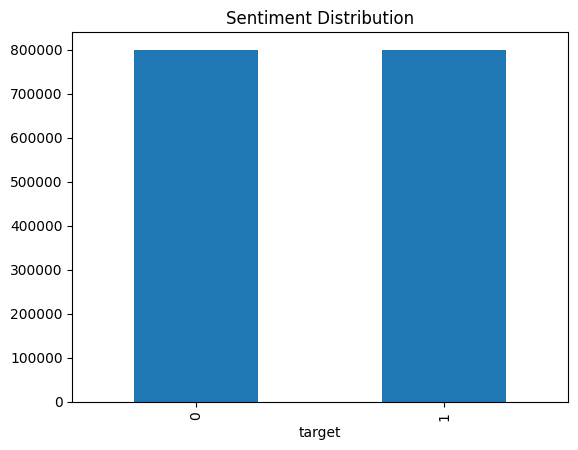

In [3]:
df['target'].value_counts().plot(kind='bar', title='Sentiment Distribution')


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\arjun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\arjun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')   # splits text into alphanumeric “words” only

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)
    tweet = re.sub(r'@\w+|#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.strip()
    
    # use regex tokenizer instead of word_tokenize()
    words = tokenizer.tokenize(tweet)
    words = [lemmatizer.lemmatize(w) for w in words 
             if w not in stop_words]
    return " ".join(words)


In [6]:
df['clean_text'] = df['text'].apply(clean_tweet)
df[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])   # ← NO .toarray()
y = df['target']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.773603125
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [13]:
import joblib

joblib.dump(model, '../models/sentiment_model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')


['../models/vectorizer.pkl']

In [20]:
import os
print("Exists up one level?:", os.path.exists('../models/sentiment_model.pkl'))
print("Exists absolute?:", os.path.exists(
    'C:/Users/arjun/OneDrive/Desktop/SA-twitter/models/sentiment_model.pkl'
))


Exists up one level?: True
Exists absolute?: True
